In [10]:
# 1. Install dependencies
!pip install keras-facenet
!pip install scikit-learn

  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10368 sha256=7ee9fc8ce95eabc731a7fca15b64bbc400b147ae5dd3250ab506c18357b0b985
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras-facenet


In [11]:
# 2. Imports
from keras_facenet import FaceNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import os

In [20]:
# 1. Set up the data generators
train_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    '/kaggle/input/fer2013plus/fer2013plus/fer2013/train',  # Path to your training data directory
    target_size=(224, 224),  # Resize image to match model input size
    batch_size=32, 
    class_mode='categorical'  # Ensures one-hot encoding for multi-class classification
)

val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    '/kaggle/input/fer2013plus/fer2013plus/fer2013/test',  # Path to your test data directory
    target_size=(224, 224),  # Resize image to match model input size
    batch_size=32, 
    class_mode='categorical'  # Ensures one-hot encoding for multi-class classification
)

Found 28386 images belonging to 8 classes.
Found 7099 images belonging to 8 classes.


In [22]:
# 3. Load Facenet model using Keras-Facenet
embedder = FaceNet()

# Get the actual Keras model (facenet)
facenet_model = embedder.model

# 4. Freeze the layers of Facenet base model (if needed)
for layer in facenet_model.layers:
    layer.trainable = False

In [23]:
# 5. Add custom classifier head
x = facenet_model.output
x = Dropout(0.5)(x)  # Add Dropout layer
output = Dense(8, activation='softmax')(x)  # Update this for 8 classes

model = Model(inputs=facenet_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()




Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 Conv2d_1a_3x3 (Conv2D)      (None, None, None, 32)       864       ['input_4[0][0]']             
                                                                                                  
 Conv2d_1a_3x3_BatchNorm (B  (None, None, None, 32)       96        ['Conv2d_1a_3x3[0][0]']       
 atchNormalization)                                                                               
                                                                                                  
 Conv2d_1a_3x3_Activation (  (None, None, None, 32)       0         ['Conv2d_1a_3x3_BatchNor

In [27]:
# 6. Train the model with proper data generators
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=40,  # Adjust the number of epochs as needed
    steps_per_epoch=train_gen.samples // train_gen.batch_size,
    validation_steps=val_gen.samples // val_gen.batch_size
)

Epoch 1/40
887/887 [==============================] - 76s 85ms/step - loss: 1.3617 - accuracy: 0.4854 - val_loss: 1.3574 - val_accuracy: 0.4976
Epoch 2/40
887/887 [==============================] - 76s 85ms/step - loss: 1.3607 - accuracy: 0.4878 - val_loss: 1.3547 - val_accuracy: 0.4994
Epoch 3/40
887/887 [==============================] - 77s 87ms/step - loss: 1.3586 - accuracy: 0.4882 - val_loss: 1.3528 - val_accuracy: 0.5008
Epoch 4/40
887/887 [==============================] - 74s 83ms/step - loss: 1.3566 - accuracy: 0.4885 - val_loss: 1.3508 - val_accuracy: 0.5020
Epoch 5/40
887/887 [==============================] - 76s 86ms/step - loss: 1.3559 - accuracy: 0.4895 - val_loss: 1.3492 - val_accuracy: 0.5020
Epoch 6/40
887/887 [==============================] - 71s 80ms/step - loss: 1.3535 - accuracy: 0.4891 - val_loss: 1.3475 - val_accuracy: 0.5016
Epoch 7/40
887/887 [==============================] - 75s 84ms/step - loss: 1.3536 - accuracy: 0.4908 - val_loss: 1.3470 - val_accuracy:

In [29]:
#6. Save the model
model.save('/kaggle/working/emotion_classifier_facenet.h5')


Epoch 1/10
888/888 [==============================] - 74s 83ms/step - loss: 1.3270 - accuracy: 0.4962 - val_loss: 1.3142 - val_accuracy: 0.5104
Epoch 2/10
888/888 [==============================] - 74s 83ms/step - loss: 1.3266 - accuracy: 0.4956 - val_loss: 1.3137 - val_accuracy: 0.5106
Epoch 3/10
888/888 [==============================] - 75s 84ms/step - loss: 1.3240 - accuracy: 0.4945 - val_loss: 1.3133 - val_accuracy: 0.5102
Epoch 4/10
888/888 [==============================] - 72s 81ms/step - loss: 1.3249 - accuracy: 0.4961 - val_loss: 1.3127 - val_accuracy: 0.5102
Epoch 5/10
888/888 [==============================] - 79s 89ms/step - loss: 1.3225 - accuracy: 0.4976 - val_loss: 1.3122 - val_accuracy: 0.5102
Epoch 6/10
888/888 [==============================] - 73s 82ms/step - loss: 1.3225 - accuracy: 0.4970 - val_loss: 1.3118 - val_accuracy: 0.5102
Epoch 7/10
888/888 [==============================] - 68s 76ms/step - loss: 1.3222 - accuracy: 0.5000 - val_loss: 1.3113 - val_accuracy:

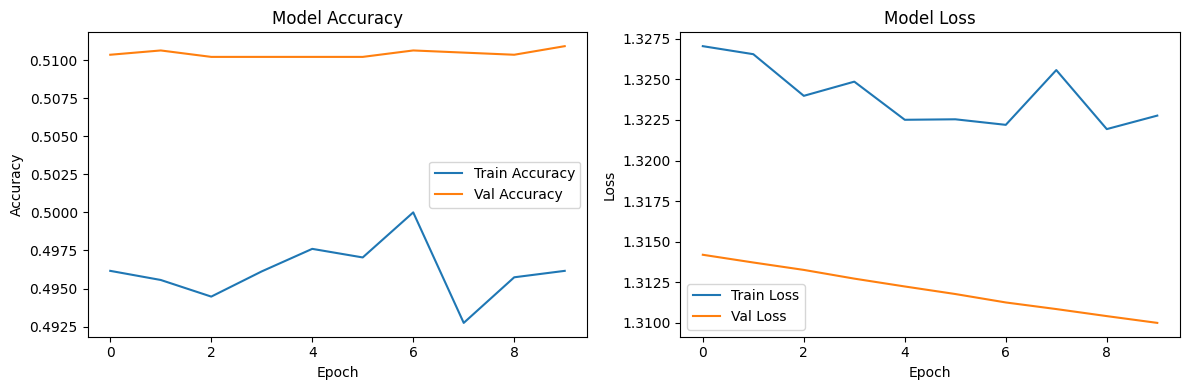

In [30]:
import matplotlib.pyplot as plt

# Train the model and save history
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


222/222 [==============================] - 15s 65ms/step


<Figure size 2000x1000 with 0 Axes>

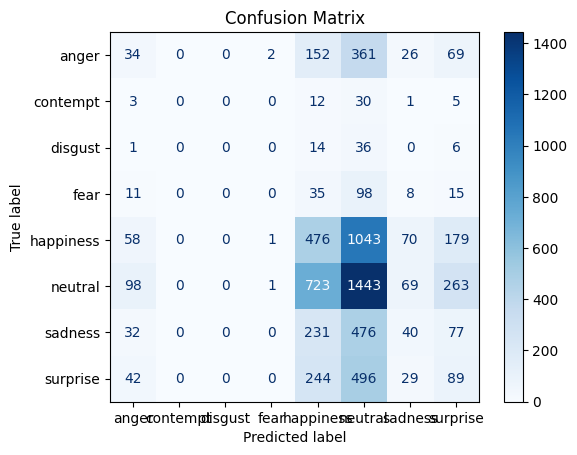

Classification Report:

              precision    recall  f1-score   support

       anger       0.12      0.05      0.07       644
    contempt       0.00      0.00      0.00        51
     disgust       0.00      0.00      0.00        57
        fear       0.00      0.00      0.00       167
   happiness       0.25      0.26      0.26      1827
     neutral       0.36      0.56      0.44      2597
     sadness       0.16      0.05      0.07       856
    surprise       0.13      0.10      0.11       900

    accuracy                           0.29      7099
   macro avg       0.13      0.13      0.12      7099
weighted avg       0.24      0.29      0.26      7099



In [33]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Get ground-truth labels and predictions
val_gen.reset()
pred_probs = model.predict(val_gen, verbose=1)
y_pred = np.argmax(pred_probs, axis=1)
y_true = val_gen.classes

# Get class labels
class_names = list(val_gen.class_indices.keys())

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot confusion matrix
plt.figure(figsize=(20, 10))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


In [35]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(val_gen)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


222/222 [==============================] - 14s 61ms/step - loss: 1.3100 - accuracy: 0.5109
Test Accuracy: 51.09%
Test Loss: 1.3100


1/1 [==============================] - 0s 28ms/step


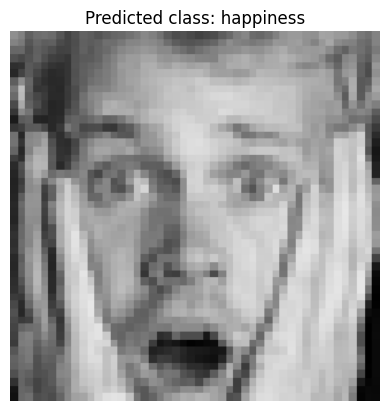

Prediction probabilities: [0.08219413 0.05100074 0.03493344 0.05919578 0.59831    0.10398369
 0.01305566 0.05732658]


In [39]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load an image for prediction (replace 'path_to_image' with the actual image path)
img_path = '/kaggle/input/fer2013plus/fer2013plus/fer2013/test/surprise/fer0028686.png'  # Replace with the actual image path
img = image.load_img(img_path, target_size=(224, 224))  # Resize to the model input size
img_array = image.img_to_array(img)  # Convert the image to a numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = preprocess_input(img_array)  # Preprocess image for the model

# Make predictions
predictions = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions, axis=1)

# Map the predicted class index to the class name
class_labels = train_gen.class_indices
class_labels = {v: k for k, v in class_labels.items()}  # Invert the dictionary for easy lookup
predicted_class_name = class_labels[predicted_class_index[0]]

# Plot the image and the prediction
plt.imshow(img)
plt.title(f"Predicted class: {predicted_class_name}")
plt.axis('off')  # Hide axes
plt.show()

# Print prediction probabilities (optional)
print(f"Prediction probabilities: {predictions[0]}")

